In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
train=pd.read_excel(r'C:\Users\Priyanka\Downloads\Data_Train.xlsx')
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [15]:
#Reading test data
test=pd.read_excel(r'C:\Users\Priyanka\Downloads\Data_Test.xlsx')
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [16]:
print('The shape of train data is: ',train.shape)
print('The shape of the test data is: ',test.shape)

The shape of train data is:  (12690, 9)
The shape of the test data is:  (4231, 8)


In [17]:
#Checking for the null values
null1=train.isnull().sum().reset_index()
null2=test.isnull().sum().reset_index()
null_tot=[null1,null2]
a=pd.concat(null_tot,axis=1)
a.columns=['train_col','total_null','test _col','total_null']
a

,train_col,total_null,test _col,total_null
0,TITLE,0,TITLE,0.0
1,RESTAURANT_ID,0,RESTAURANT_ID,0.0
2,CUISINES,0,CUISINES,0.0
3,TIME,0,TIME,0.0
4,CITY,112,CITY,35.0
5,LOCALITY,98,LOCALITY,30.0
6,RATING,2,RATING,2.0
7,VOTES,1204,VOTES,402.0
8,COST,0,NaN,NaN


1. We can see that in train data set column- city,locality,rating,votes has null values.
2. In test dataset columns- city, locality, rating, votes has null values.

In [18]:
#Lets remove null values for train dataset
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
imp=SimpleImputer(strategy='median')

In [19]:
train['CITY']=si.fit_transform(train['CITY'].values.reshape(-1,1))
train['LOCALITY']=si.fit_transform(train['LOCALITY'].values.reshape(-1,1))
train['RATING']=si.fit_transform(train['RATING'].values.reshape(-1,1))
train['VOTES'].fillna('0 votes',inplace=True)

In [20]:
train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In train data we have two int type columns: RESTAURANT_ID and COST else others are object type columns 

In [22]:
train['CITY'].value_counts()

Chennai                        2286
Bangalore                      2149
Hyderabad                      1819
Mumbai                         1722
New Delhi                      1321
                               ... 
opp mukteshwar ashram powai       1
Kalyan                            1
Avadi                             1
opp gurudwara Shakurpur           1
10th avenue                       1
Name: CITY, Length: 359, dtype: int64

In [23]:
#Checking for the maximum titles that a restaurant holds.
max_train=train['TITLE'].apply(lambda x: len(x.split(',')))
print('Total maximum titles corresponding to a restaurant in train set is:',max_train.max())
max_test=test['TITLE'].apply(lambda x:len(x.split(',')))
print('Total maximum titles corresponding to a restaurant in test set is:',max_test.max())

Total maximum titles corresponding to a restaurant in train set is: 2
Total maximum titles corresponding to a restaurant in test set is: 2


So we can further divide this single title column to two for the data to become machine readable and possible encoding could be done

In [24]:
#Checking for maximum cuisines that a restaurant offers.
cuisine_train=train['CUISINES'].apply(lambda x:len(x.split(',')))
print('Maximum number of cuisines offered by a restaurant in train data set is: ',cuisine_train.max())
cuisine_test=test['CUISINES'].apply(lambda x:len(x.split(',')))
print('Maximum number of cuisines offered by a restaurant in test data set is: ',cuisine_test.max())

Maximum number of cuisines offered by a restaurant in train data set is:  8
Maximum number of cuisines offered by a restaurant in test data set is:  8


So we can divide cuisine column into separate 8 columns holding one cuisine each for the corresponding restaurant and then encoding would be easy.

In [25]:
#We will try to remove the inconsistency if any in the columns : TITLE and CUISINES so as to avoid more than one encoding for an entry.
import re
def srt(r):
    sort=re.sub(r'\([^()]+\)',lambda x:x.group().replace(',','-'),r) 
    return ','.join(sorted(sort.lower().replace(' ','').split(',')))

In [26]:
train['TITLE']=train['TITLE'].apply(lambda x:srt(x))
train['CUISINES']=train['CUISINES'].apply(lambda x:srt(x))

In [27]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,casualdining,9438,"goan,malwani,northindian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"bar,casualdining",13198,"asian,japanese,modernindian",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,casualdining,10915,"biryani,chinese,hyderabadi,northindian","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,quickbites,6346,"chinese,tibetan",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,dessertparlor,15387,desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,quickbites,13228,"burger,kebab,northindian","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"bar,casualdining",9686,"continental,goan","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,lounge,11133,"asian,chinese,continental,fingerfood",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,casualdining,6134,"chinese,northindian,southindian,streetfood",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [28]:
#Lets make a list of all the occuring strings in the title and then encode them.
#For that we define a function title_all
def title_all(s):
    total=''
    for i in s:
        total+=i+','
    return total

In [29]:
#For train data
list=title_all(train['TITLE'])
list

'casualdining,bar,casualdining,casualdining,quickbites,dessertparlor,casualdining,café,microbrewery,quickbites,quickbites,casualdining,beverageshop,quickbites,casualdining,casualdining,quickbites,casualdining,iranicafe,casualdining,casualdining,casualdining,bakery,quickbites,casualdining,quickbites,none,casualdining,café,quickbites,casualdining,bar,casualdining,bar,pub,quickbites,café,café,quickbites,beverageshop,quickbites,quickbites,café,casualdining,quickbites,quickbites,quickbites,quickbites,quickbites,quickbites,casualdining,finedining,bar,casualdining,casualdining,dessertparlor,casualdining,café,casualdining,quickbites,quickbites,café,quickbites,quickbites,quickbites,casualdining,casualdining,casualdining,casualdining,quickbites,quickbites,beverageshop,dessertparlor,casualdining,quickbites,casualdining,casualdining,none,quickbites,sweetshop,quickbites,casualdining,quickbites,casualdining,dessertparlor,sweetshop,bakery,quickbites,beverageshop,quickbites,casualdining,quickbites,bak

Above list contains many elements occuring more than one lets take the count of every unique element in the list.


In [30]:
from collections import Counter
count=pd.DataFrame.from_dict(dict(Counter(list.split(',')).most_common()),orient='index').reset_index()
count.columns=['Titles','Count']

In [31]:
count

,Titles,Count
0,quickbites,4598
1,casualdining,4379
2,none,1003
3,café,843
4,bar,682
5,dessertparlor,616
6,bakery,532
7,finedining,358
8,beverageshop,249
9,lounge,201


In [32]:
#So lets encode the list corresponding to train dataset.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
count['Codes']=le.fit_transform(count['Titles'].astype('str'))
count

,Titles,Count,Codes
0,quickbites,4598,23
1,casualdining,4379,5
2,none,1003,20
3,café,843,4
4,bar,682,2
5,dessertparlor,616,9
6,bakery,532,1
7,finedining,358,11
8,beverageshop,249,3
9,lounge,201,16


In [34]:
#Creating a dictionary for the titles and corresponding codes. This dictionary would be used to encode further.
dict_title=dict(zip(count['Titles'],count['Codes']))
dict_title

{'quickbites': 23,
 'casualdining': 5,
 'none': 20,
 'café': 4,
 'bar': 2,
 'dessertparlor': 9,
 'bakery': 1,
 'finedining': 11,
 'beverageshop': 3,
 'lounge': 16,
 'sweetshop': 24,
 'pub': 22,
 'foodcourt': 12,
 'microbrewery': 19,
 'kiosk': 15,
 'mess': 18,
 'dhaba': 10,
 'foodtruck': 13,
 'club': 6,
 'cocktailbar': 7,
 'confectionery': 8,
 'paanshop': 21,
 'iranicafe': 14,
 'meatshop': 17,
 '': 0}

In [35]:
#For cuisine column of train dataset
list1=title_all(train['CUISINES'])
list1

'goan,malwani,northindian,asian,japanese,modernindian,biryani,chinese,hyderabadi,northindian,chinese,tibetan,desserts,biryani,chinese,northindian,seafood,burger,cafe,chinese,northindian,pizza,barfood,northindian,southindian,northindian,biryani,chinese,fastfood,northindian,beverages,burger,fastfood,arabian,mughlai,southindian,maharashtrian,hyderabadi,parsi,fastfood,northindian,chinese,hyderabadi,northindian,chinese,thai,bakery,fastfood,momos,continental,european,momos,northindian,rolls,fastfood,mughlai,northindian,rolls,andhra,biryani,chinese,northindian,cafe,chinese,italian,biryani,northindian,bbq,chinese,northindian,italian,continental,fingerfood,italian,northindian,asian,continental,fingerfood,northindian,northindian,southindian,cafe,tea,american,cafe,continental,european,healthyfood,chinese,northindian,southindian,beverages,coffee,tea,asian,chinese,fastfood,indonesian,korean,arabian,burger,cafe,healthyfood,continental,chinese,northindian,chinese,northindian,southindian,chinese,north

In [36]:
count1=pd.DataFrame.from_dict(dict(Counter(list1.split(',')).most_common()),orient='index').reset_index()
count1.columns=['cuisine','counts']
count1

,cuisine,counts
0,northindian,5383
1,chinese,4368
2,southindian,2274
3,fastfood,2121
4,continental,1563
...,...,...
120,jewish,1
121,vegan,1
122,oriental,1
123,modernaustralian,1


In [37]:
#So our count of cuisines corresponding to the train dataset has more entries so we would prodceed with count3 and encode the cuisine column.
count1['cuisine_code']=le.fit_transform(count1['cuisine'].astype('str'))
count1

,cuisine,counts,cuisine_code
0,northindian,5383,86
1,chinese,4368,28
2,southindian,2274,110
3,fastfood,2121,39
4,continental,1563,31
...,...,...,...
120,jewish,1,59
121,vegan,1,122
122,oriental,1,87
123,modernaustralian,1,76


In [38]:
#Making a dictionary to dump cuisine name and corresponding codes:
dict_cuisine=dict(zip(count1['cuisine'],count1['cuisine_code']))
dict_cuisine

{'northindian': 86,
 'chinese': 28,
 'southindian': 110,
 'fastfood': 39,
 'continental': 31,
 'biryani': 17,
 'desserts': 33,
 'italian': 57,
 'beverages': 15,
 'cafe': 23,
 'mughlai': 81,
 'streetfood': 114,
 'bakery': 10,
 'seafood': 106,
 'kerala': 63,
 'pizza': 95,
 'asian': 7,
 'arabian': 5,
 'momos': 78,
 'burger': 21,
 'icecream': 52,
 'thai': 119,
 'american': 3,
 'fingerfood': 40,
 'european': 38,
 'andhra': 4,
 'mexican': 73,
 'rolls': 101,
 'salad': 103,
 'sandwich': 104,
 'juices': 60,
 'kebab': 62,
 'healthyfood': 48,
 'mithai': 75,
 'bbq': 12,
 'lebanese': 66,
 'mediterranean': 72,
 'hyderabadi': 51,
 'japanese': 58,
 'chettinad': 27,
 '': 0,
 'bengali': 14,
 'maharashtrian': 68,
 'modernindian': 77,
 'mangalorean': 71,
 'tea': 117,
 'sushi': 115,
 'malwani': 70,
 'tibetan': 120,
 'rajasthani': 98,
 'coffee': 29,
 'gujarati': 47,
 'steak': 113,
 'malaysian': 69,
 'indian': 53,
 'korean': 65,
 'barfood': 11,
 'goan': 44,
 'wraps': 124,
 'vietnamese': 123,
 'burmese': 22,


In [39]:
#Splitting cuisine in train data
for i in range(0,cuisine_train.max()):
    train['CUISINE'+str(i+1)]=train['CUISINES'].str.split(',').str[i]

In [40]:
#Splitting title in train data 
#For title
for i in range(0,max_train.max()):
   train['TITLE'+str(i+1)] =train['TITLE'].str.split(',').str[i]

In [41]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,9438,"goan,malwani,northindian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,goan,malwani,northindian,NaN,NaN,NaN,NaN,NaN,casualdining,NaN
1,"bar,casualdining",13198,"asian,japanese,modernindian",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,asian,japanese,modernindian,NaN,NaN,NaN,NaN,NaN,bar,casualdining
2,casualdining,10915,"biryani,chinese,hyderabadi,northindian","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,biryani,chinese,hyderabadi,northindian,NaN,NaN,NaN,NaN,casualdining,NaN
3,quickbites,6346,"chinese,tibetan",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,chinese,tibetan,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
4,dessertparlor,15387,desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dessertparlor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,quickbites,13228,"burger,kebab,northindian","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,burger,kebab,northindian,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
12686,"bar,casualdining",9686,"continental,goan","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,continental,goan,NaN,NaN,NaN,NaN,NaN,NaN,bar,casualdining
12687,lounge,11133,"asian,chinese,continental,fingerfood",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,asian,chinese,continental,fingerfood,NaN,NaN,NaN,NaN,lounge,NaN
12688,casualdining,6134,"chinese,northindian,southindian,streetfood",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,chinese,northindian,southindian,streetfood,NaN,NaN,NaN,NaN,casualdining,NaN


In [42]:
grp=['CUISINE1','CUISINE2','CUISINE3','CUISINE4','CUISINE5','CUISINE6','CUISINE7','CUISINE8']
for i in grp:
    train.replace({i:dict_cuisine},inplace=True)

In [43]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,9438,"goan,malwani,northindian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,44,70.0,86.0,NaN,NaN,NaN,NaN,NaN,casualdining,NaN
1,"bar,casualdining",13198,"asian,japanese,modernindian",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,7,58.0,77.0,NaN,NaN,NaN,NaN,NaN,bar,casualdining
2,casualdining,10915,"biryani,chinese,hyderabadi,northindian","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,17,28.0,51.0,86.0,NaN,NaN,NaN,NaN,casualdining,NaN
3,quickbites,6346,"chinese,tibetan",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,28,120.0,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
4,dessertparlor,15387,desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dessertparlor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,quickbites,13228,"burger,kebab,northindian","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,21,62.0,86.0,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
12686,"bar,casualdining",9686,"continental,goan","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,31,44.0,NaN,NaN,NaN,NaN,NaN,NaN,bar,casualdining
12687,lounge,11133,"asian,chinese,continental,fingerfood",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,7,28.0,31.0,40.0,NaN,NaN,NaN,NaN,lounge,NaN
12688,casualdining,6134,"chinese,northindian,southindian,streetfood",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,28,86.0,110.0,114.0,NaN,NaN,NaN,NaN,casualdining,NaN


In [44]:
group=['TITLE1','TITLE2']
for i in group:
     train.replace({i:dict_title},inplace=True)

In [45]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,9438,"goan,malwani,northindian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,44,70.0,86.0,NaN,NaN,NaN,NaN,NaN,5,NaN
1,"bar,casualdining",13198,"asian,japanese,modernindian",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,7,58.0,77.0,NaN,NaN,NaN,NaN,NaN,2,5.0
2,casualdining,10915,"biryani,chinese,hyderabadi,northindian","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,17,28.0,51.0,86.0,NaN,NaN,NaN,NaN,5,NaN
3,quickbites,6346,"chinese,tibetan",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,28,120.0,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN
4,dessertparlor,15387,desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,quickbites,13228,"burger,kebab,northindian","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,21,62.0,86.0,NaN,NaN,NaN,NaN,NaN,23,NaN
12686,"bar,casualdining",9686,"continental,goan","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,31,44.0,NaN,NaN,NaN,NaN,NaN,NaN,2,5.0
12687,lounge,11133,"asian,chinese,continental,fingerfood",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,7,28.0,31.0,40.0,NaN,NaN,NaN,NaN,16,NaN
12688,casualdining,6134,"chinese,northindian,southindian,streetfood",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,28,86.0,110.0,114.0,NaN,NaN,NaN,NaN,5,NaN


In [46]:
#Lets remove the string 'votes' from the column votes and covert the column to int type.
train['VOTES']=train['VOTES'].str.rstrip('votes').astype('int')

In [47]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,9438,"goan,malwani,northindian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,44,70.0,86.0,NaN,NaN,NaN,NaN,NaN,5,NaN
1,"bar,casualdining",13198,"asian,japanese,modernindian",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,7,58.0,77.0,NaN,NaN,NaN,NaN,NaN,2,5.0
2,casualdining,10915,"biryani,chinese,hyderabadi,northindian","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,17,28.0,51.0,86.0,NaN,NaN,NaN,NaN,5,NaN
3,quickbites,6346,"chinese,tibetan",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,28,120.0,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN
4,dessertparlor,15387,desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,quickbites,13228,"burger,kebab,northindian","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500,21,62.0,86.0,NaN,NaN,NaN,NaN,NaN,23,NaN
12686,"bar,casualdining",9686,"continental,goan","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800,31,44.0,NaN,NaN,NaN,NaN,NaN,NaN,2,5.0
12687,lounge,11133,"asian,chinese,continental,fingerfood",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300,7,28.0,31.0,40.0,NaN,NaN,NaN,NaN,16,NaN
12688,casualdining,6134,"chinese,northindian,southindian,streetfood",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400,28,86.0,110.0,114.0,NaN,NaN,NaN,NaN,5,NaN


Dropping the columns: 
1. TITLE as we have split this column into two columns to make data more informative.
2. CUISINES as we have split cuisine column too.
3. TIME column is not in proper format, it is difficult to extract information from this column.

In [48]:
train.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)

In [49]:
train

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,9438,Thane,Dombivali East,3.6,49,1200,44,70.0,86.0,NaN,NaN,NaN,NaN,NaN,5,NaN
1,13198,Chennai,Ramapuram,4.2,30,1500,7,58.0,77.0,NaN,NaN,NaN,NaN,NaN,2,5.0
2,10915,Chennai,Saligramam,3.8,221,800,17,28.0,51.0,86.0,NaN,NaN,NaN,NaN,5,NaN
3,6346,Mumbai,Bandra West,4.1,24,800,28,120.0,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN
4,15387,Mumbai,Lower Parel,3.8,165,300,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,Hyderabad,Gachibowli,3.8,546,500,21,62.0,86.0,NaN,NaN,NaN,NaN,NaN,23,NaN
12686,9686,Mumbai,Bandra Kurla Complex,4.3,1214,1800,31,44.0,NaN,NaN,NaN,NaN,NaN,NaN,2,5.0
12687,11133,Navi Mumbai,Vashi,4.0,608,1300,7,28.0,31.0,40.0,NaN,NaN,NaN,NaN,16,NaN
12688,6134,Chennai,Maduravoyal,3.5,32,400,28,86.0,110.0,114.0,NaN,NaN,NaN,NaN,5,NaN


In [50]:
#Encoding the columns CITY, LOCALITY.
train['CITY']=le.fit_transform(train['CITY'].astype('str'))
train['LOCALITY']=le.fit_transform(train['LOCALITY'].astype('str'))

In [51]:
train

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,9438,320,285,3.6,49,1200,44,70.0,86.0,NaN,NaN,NaN,NaN,NaN,5,NaN
1,13198,67,1046,4.2,30,1500,7,58.0,77.0,NaN,NaN,NaN,NaN,NaN,2,5.0
2,10915,67,1101,3.8,221,800,17,28.0,51.0,86.0,NaN,NaN,NaN,NaN,5,NaN
3,6346,222,136,4.1,24,800,28,120.0,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN
4,15387,222,620,3.8,165,300,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,131,342,3.8,546,500,21,62.0,86.0,NaN,NaN,NaN,NaN,NaN,23,NaN
12686,9686,222,133,4.3,1214,1800,31,44.0,NaN,NaN,NaN,NaN,NaN,NaN,2,5.0
12687,11133,239,1342,4.0,608,1300,7,28.0,31.0,40.0,NaN,NaN,NaN,NaN,16,NaN
12688,6134,67,631,3.5,32,400,28,86.0,110.0,114.0,NaN,NaN,NaN,NaN,5,NaN


In [52]:
#Filling the null values present in the data with -1 as we have used zero to fill the null values of votes column.
train.fillna(-1,inplace=True)

In [53]:
train

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,9438,320,285,3.6,49,1200,44,70.0,86.0,-1.0,-1.0,-1.0,-1.0,-1.0,5,-1.0
1,13198,67,1046,4.2,30,1500,7,58.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,5.0
2,10915,67,1101,3.8,221,800,17,28.0,51.0,86.0,-1.0,-1.0,-1.0,-1.0,5,-1.0
3,6346,222,136,4.1,24,800,28,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,23,-1.0
4,15387,222,620,3.8,165,300,33,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,131,342,3.8,546,500,21,62.0,86.0,-1.0,-1.0,-1.0,-1.0,-1.0,23,-1.0
12686,9686,222,133,4.3,1214,1800,31,44.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,5.0
12687,11133,239,1342,4.0,608,1300,7,28.0,31.0,40.0,-1.0,-1.0,-1.0,-1.0,16,-1.0
12688,6134,67,631,3.5,32,400,28,86.0,110.0,114.0,-1.0,-1.0,-1.0,-1.0,5,-1.0


In [54]:
train.dtypes

RESTAURANT_ID      int64
CITY               int32
LOCALITY           int32
RATING            object
VOTES              int32
COST               int64
CUISINE1           int64
CUISINE2         float64
CUISINE3         float64
CUISINE4         float64
CUISINE5         float64
CUISINE6         float64
CUISINE7         float64
CUISINE8         float64
TITLE1             int64
TITLE2           float64
dtype: object

In [55]:
train['RATING'].value_counts()

3.9    1240
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
3.1     186
2.9     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

In [56]:
#As we can see the presence of NEW and - in the entries of RATING. Lets replace these with 0.
train['RATING']=train["RATING"].str.replace(r"(NEW)", "0.0").str.replace("-","0.0")

In [57]:
train['RATING'].value_counts()

3.9    1240
0.0    1202
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
3.1     186
2.9     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

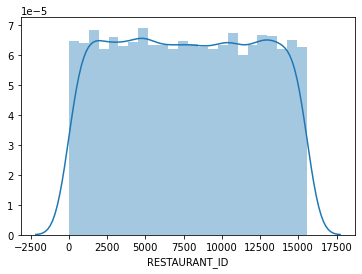

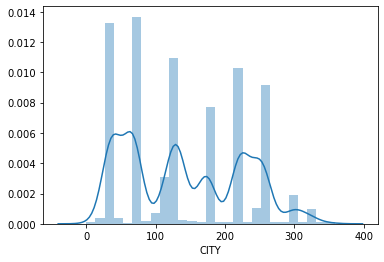

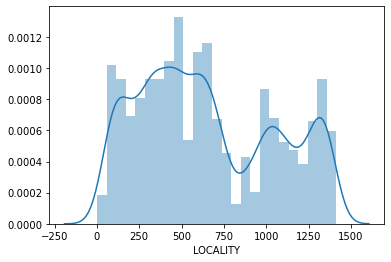

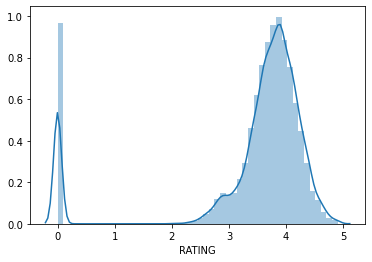

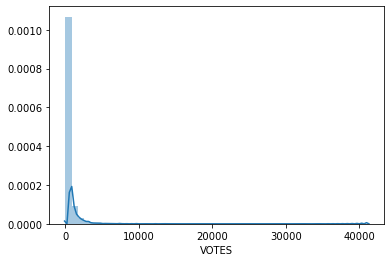

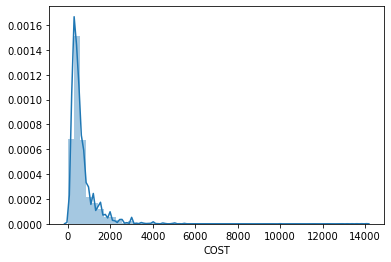

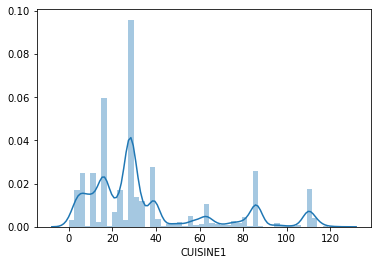

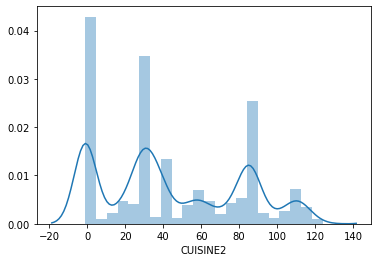

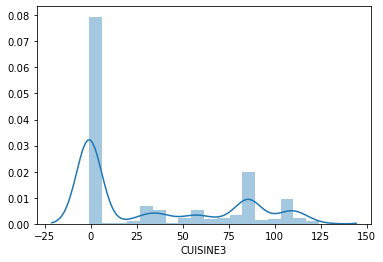

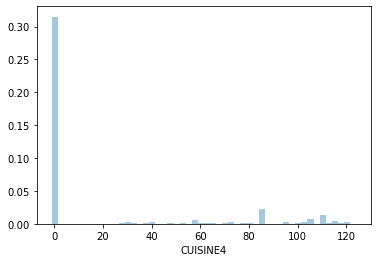

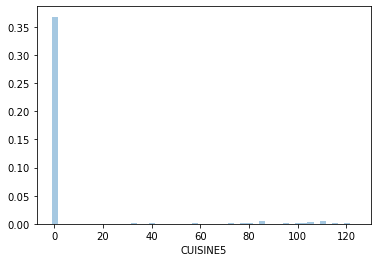

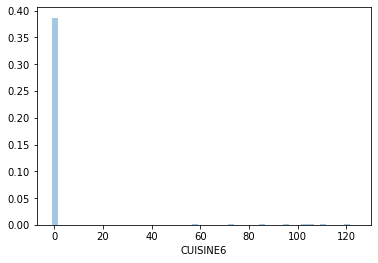

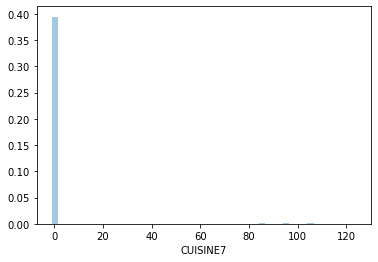

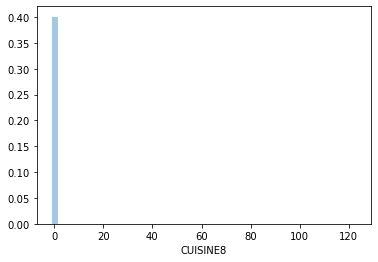

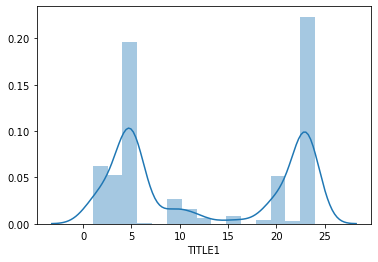

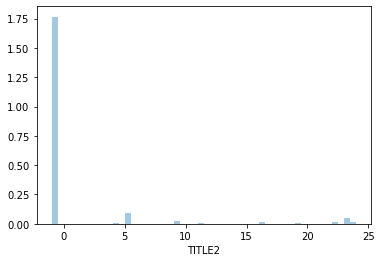

In [58]:
#Lets see the distribution of the train data set using distplot
for i in train.columns:
    sns.distplot(train[i])
    plt.show()

Observations:
    1. We observe our Restaurant_id column to be spread between 0-15500 approx.
    2. CITY is psread between 0-400.
    3. Locality is spread between 0-1500.
    4. RATING is spread between 0-5.
    5. VOTES is between 0-4000 with max number of votes concentrated at around 100. VOTE is right skewed.
    6. COST column is spread between 0-14000 with maximum occuring cost between 0-2000. COST column is right skewed too.
    7. CUISINE1 column is spread between 0-120. 
    8. Column CUISINE2 is spread between 0-140.
    9. Column CUISINE3 is spread between 0-150.
    10. CUISINE4, CUISINE5,CUISINE6, CUISINE7, CUISINE8 has most entries to be 0.
    11. TITLE1 has data spread between 0-25.
    12. TITLE2 has data at 0 mostly.

In [59]:
train['RATING']=train['RATING'].astype('float')

In [60]:
train.describe()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,142.281403,652.391568,3.426911,376.231127,655.252246,35.595508,44.169819,33.189756,17.296454,6.170292,2.004886,0.332230,-0.372183,12.616154,0.604492
std,4504.874150,83.921428,399.116379,1.179029,810.946942,627.003540,28.926566,36.754035,42.217895,37.108917,25.334271,16.895920,11.470794,8.123753,8.838733,5.214721
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,3863.250000,67.000000,337.000000,3.400000,39.250000,300.000000,17.000000,12.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,-1.000000
50%,7740.000000,131.000000,582.000000,3.800000,132.000000,500.000000,28.000000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,9.000000,-1.000000
75%,11688.750000,222.000000,1009.000000,4.000000,405.000000,800.000000,39.000000,81.000000,81.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,23.000000,-1.000000
max,15573.000000,358.000000,1415.000000,4.900000,41186.000000,14000.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,123.000000,24.000000,24.000000


1. Count for every column is 12690.
2. Minimun number of votes is 0 maximum is 41186.
3. Huge gap between median and mean in the columns LOCALITY, VOTES, COST, CUISINE3, CUISINE4 tells that our data is skewed.
4. The great difference between the 75th percentile and max in columns: VOTES, COST, CUISINE1, CUISINE3, CUISINE4, CUISINE5, CUISINE6, CUISINE7, CUISINE8, TITLE2 indicates the presence of outliers.
5. Standard Deviation for columns : RESTAURANT_ID, LOCALITY, VOTES, COST is quite high.

In [61]:
train.corr()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
RESTAURANT_ID,1.000000,0.005112,-0.004242,0.031314,0.000739,0.040710,0.034854,0.017041,0.018191,0.017596,0.012041,0.004706,0.009882,0.006889,-0.004275,-0.006072
CITY,0.005112,1.000000,0.043072,-0.054002,0.042055,0.044555,0.020908,0.019194,0.015459,0.012198,0.023778,0.002870,0.003076,-0.000999,-0.019555,0.002431
LOCALITY,-0.004242,0.043072,1.000000,-0.017268,-0.029024,-0.015050,0.028105,-0.001948,-0.002868,-0.019025,-0.018224,-0.015490,-0.024823,-0.018492,0.029331,-0.000532
RATING,0.031314,-0.054002,-0.017268,1.000000,0.258258,0.232194,-0.079731,0.023359,0.103530,0.119508,0.098873,0.070100,0.047942,0.031327,-0.131151,0.075257
VOTES,0.000739,0.042055,-0.029024,0.258258,1.000000,0.257231,-0.082910,0.007145,0.125968,0.152545,0.107902,0.070731,0.062425,0.062145,-0.166076,0.102167
COST,0.040710,0.044555,-0.015050,0.232194,0.257231,1.000000,-0.105607,0.006201,0.158702,0.189824,0.145007,0.095204,0.054345,0.040165,-0.334136,0.108291
CUISINE1,0.034854,0.020908,0.028105,-0.079731,-0.082910,-0.105607,1.000000,-0.096397,-0.313750,-0.262491,-0.183857,-0.141139,-0.111290,-0.086193,0.259791,-0.104536
CUISINE2,0.017041,0.019194,-0.001948,0.023359,0.007145,0.006201,-0.096397,1.000000,0.183721,-0.063828,-0.093708,-0.089095,-0.079872,-0.066411,0.057183,-0.000454
CUISINE3,0.018191,0.015459,-0.002868,0.103530,0.125968,0.158702,-0.313750,0.183721,1.000000,0.391274,0.126073,0.029425,-0.005251,-0.015463,-0.139074,0.043116
CUISINE4,0.017596,0.012198,-0.019025,0.119508,0.152545,0.189824,-0.262491,-0.063828,0.391274,1.000000,0.439183,0.192361,0.087139,0.037510,-0.166384,0.063202


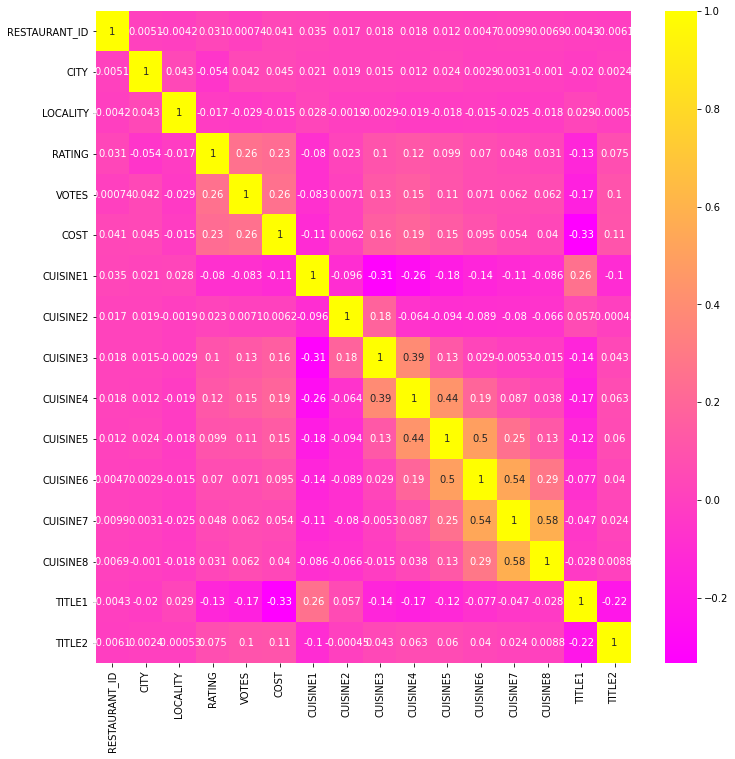

In [62]:
#Lets analyze correlation with the help of Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True,cmap='spring')

Observations:
    1. Target variable COST is negatively correlated with TITLE1.
    2. CUISINE3 is negatively correlated with CUISINE1.
    3. CUISINE5 and CUISINE6, CUISINE6 and CUISINE7, CUISINE7 and CUISINE8 are not strongly but positively correlated.

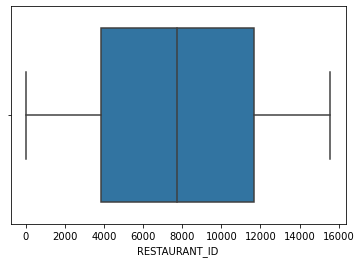

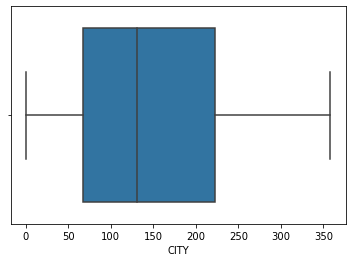

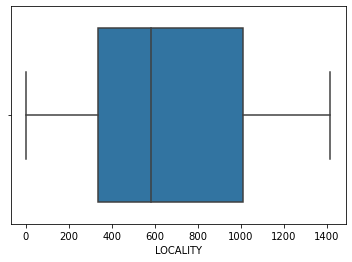

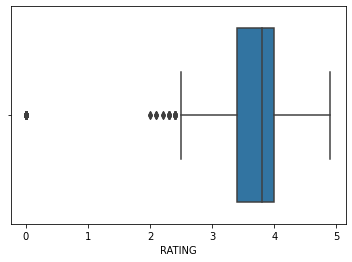

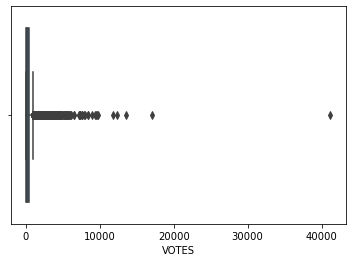

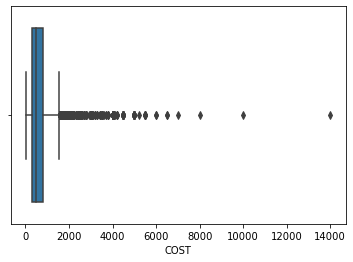

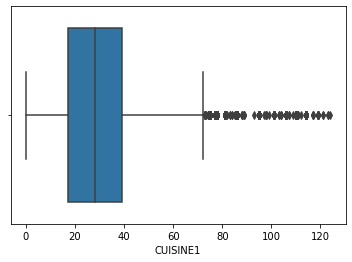

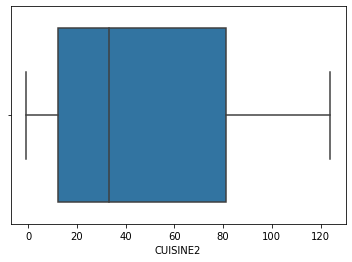

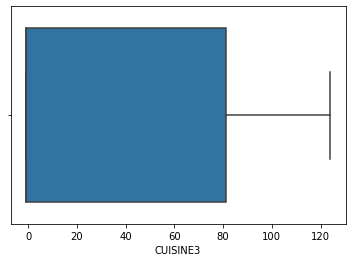

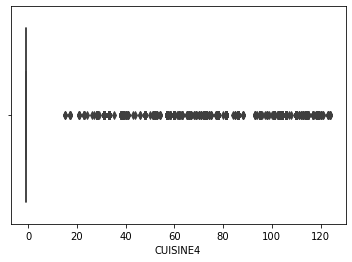

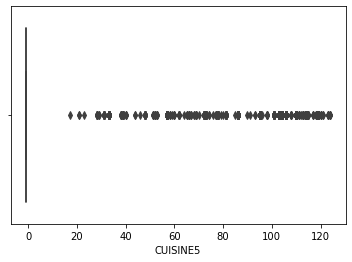

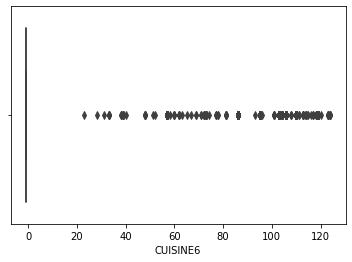

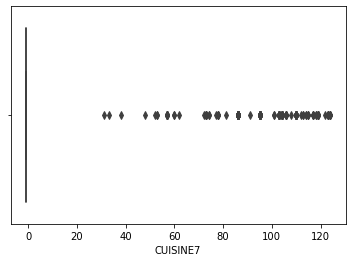

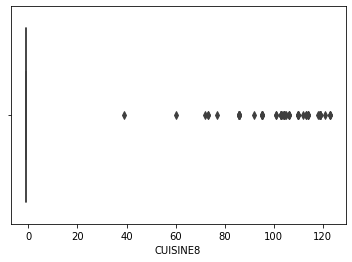

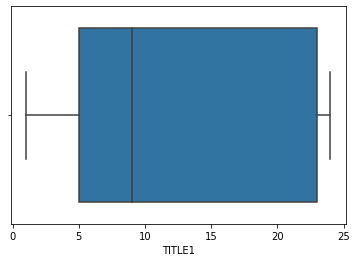

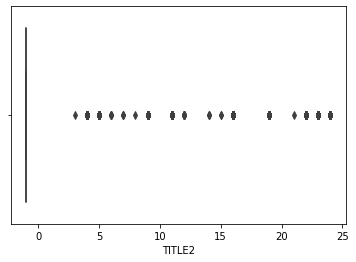

In [63]:
#Plotting boxplot to see the presence of outliers.
for i in train.columns:
    sns.boxplot(train[i])
    plt.show()

Outliers are present in the columns: RATING, VOTES, COST,CUISINE1, CUISINE4, CUISINE5, CUISINE6, CUISINE7, CUISINE8, TITLE2.

In [64]:
#Lets check the skewness of the data
train.skew()

RESTAURANT_ID     0.006947
CITY              0.266332
LOCALITY          0.352317
RATING           -2.216295
VOTES            14.522617
COST              3.978801
CUISINE1          1.306230
CUISINE2          0.332172
CUISINE3          0.677859
CUISINE4          1.693948
CUISINE5          3.441546
CUISINE6          5.692530
CUISINE7          8.760835
CUISINE8         13.077487
TITLE1            0.145007
TITLE2            3.562446
dtype: float64

1. We see left skewness in columns- RATING and right skewness in columns: VOTES, COST, CUISINE1, CUISINE3, CUISINE4, CUISINE5, CUISINE6, CUISINE7, CUISINE8, TITLE1, TITLE2.
2. We will remove the skewness using Power Transformer.

In [65]:
#Removing skewness using PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [66]:
for i in train.skew().index:
    if train.skew().loc[i]>0.55:
        train[i]=pt.fit_transform(train[i].values.reshape(-1,1))
    if train.skew().loc[i]<-0.55:
        train[i]=pt.fit_transform(train[i].values.reshape(-1,1))
    else:
        train[i]=train[i]

In [67]:
train.skew()

RESTAURANT_ID     0.006947
CITY              0.266332
LOCALITY          0.352317
RATING           -0.779123
VOTES            -0.025811
COST              0.000538
CUISINE1         -0.002819
CUISINE2          0.332172
CUISINE3          0.240271
CUISINE4          1.407233
CUISINE5          3.097042
CUISINE6          5.262361
CUISINE7          8.314606
CUISINE8         12.722011
TITLE1            0.145007
TITLE2            2.386753
dtype: float64

In [68]:
#Removing outliers if any in the data
from scipy.stats import zscore
z=np.abs(zscore(train))

In [69]:
#Threshold=3
train_new=train[(z<3).all(axis=1)]
print('Before removing outliers shape was: ',train.shape,'\tAfter removing outliers shape is: ',train_new.shape)

Before removing outliers shape was:  (12690, 16) 	After removing outliers shape is:  (11640, 16)


In [70]:
train_new

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,9438,320,285,-0.132731,-0.499292,1.219366,0.578469,70.0,1.180293,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,5,-0.363628
1,13198,67,1046,0.949908,-0.719411,1.480024,-1.376007,58.0,1.141557,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,2,2.739962
2,10915,67,1101,0.194902,0.297233,0.717621,-0.541506,28.0,0.997972,1.932122,-0.294852,-0.183642,-0.118593,-0.078133,5,-0.363628
3,6346,222,136,0.748140,-0.813453,0.717621,0.015948,120.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,23,-0.363628
4,15387,222,620,0.194902,0.127686,-0.660934,0.213945,-1.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,9,-0.363628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,131,342,0.194902,0.872552,0.087605,-0.313378,62.0,1.180293,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,23,-0.363628
12686,9686,222,133,1.160722,1.450483,1.685227,0.137743,44.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,2,2.739962
12687,11133,239,1342,0.555197,0.946357,1.314092,-1.376007,28.0,0.826551,1.879827,-0.294852,-0.183642,-0.118593,-0.078133,16,-0.363628
12688,6134,67,631,-0.284841,-0.691508,-0.230885,0.015948,86.0,1.266814,1.946533,-0.294852,-0.183642,-0.118593,-0.078133,5,-0.363628


In [71]:
train_new.skew()

RESTAURANT_ID    0.011778
CITY             0.283760
LOCALITY         0.344817
RATING          -0.782124
VOTES           -0.058816
COST             0.106454
CUISINE1         0.098592
CUISINE2         0.245967
CUISINE3         0.428750
CUISINE4         2.037557
CUISINE5         0.000000
CUISINE6         0.000000
CUISINE7         0.000000
CUISINE8         0.000000
TITLE1           0.069649
TITLE2           2.565844
dtype: float64

In [72]:
#Splitting the data into x and y
x=train_new.drop(['COST'],axis=1)
x

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,9438,320,285,-0.132731,-0.499292,0.578469,70.0,1.180293,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,5,-0.363628
1,13198,67,1046,0.949908,-0.719411,-1.376007,58.0,1.141557,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,2,2.739962
2,10915,67,1101,0.194902,0.297233,-0.541506,28.0,0.997972,1.932122,-0.294852,-0.183642,-0.118593,-0.078133,5,-0.363628
3,6346,222,136,0.748140,-0.813453,0.015948,120.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,23,-0.363628
4,15387,222,620,0.194902,0.127686,0.213945,-1.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,9,-0.363628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,131,342,0.194902,0.872552,-0.313378,62.0,1.180293,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,23,-0.363628
12686,9686,222,133,1.160722,1.450483,0.137743,44.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-0.078133,2,2.739962
12687,11133,239,1342,0.555197,0.946357,-1.376007,28.0,0.826551,1.879827,-0.294852,-0.183642,-0.118593,-0.078133,16,-0.363628
12688,6134,67,631,-0.284841,-0.691508,0.015948,86.0,1.266814,1.946533,-0.294852,-0.183642,-0.118593,-0.078133,5,-0.363628


In [73]:
y=train_new['COST']
y

0        1.219366
1        1.480024
2        0.717621
3        0.717621
4       -0.660934
           ...   
12685    0.087605
12686    1.685227
12687    1.314092
12688   -0.230885
12689    0.338419
Name: COST, Length: 11640, dtype: float64

In [74]:
#Scaling the data using MinMaxScaler

In [75]:
from sklearn.preprocessing import MinMaxScaler
mnm=MinMaxScaler()

In [76]:
x1=mnm.fit_transform(x)
x=pd.DataFrame(x1,columns=x.columns)
x

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,0.606049,0.893855,0.201413,0.440284,0.292760,0.672010,0.568,0.941619,0.000000,0.0,0.0,0.0,0.0,0.173913,0.000000
1,0.847492,0.187151,0.739223,0.659766,0.247174,0.248792,0.472,0.924056,0.000000,0.0,0.0,0.0,0.0,0.043478,0.993418
2,0.700893,0.187151,0.778092,0.506704,0.457718,0.429493,0.232,0.858952,0.992591,0.0,0.0,0.0,0.0,0.173913,0.000000
3,0.407500,0.620112,0.096113,0.618862,0.227699,0.550203,0.968,0.000000,0.000000,0.0,0.0,0.0,0.0,0.956522,0.000000
4,0.988056,0.620112,0.438163,0.506704,0.422605,0.593077,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.347826,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,0.849419,0.365922,0.241696,0.506704,0.576864,0.478892,0.504,0.941619,0.000000,0.0,0.0,0.0,0.0,0.956522,0.000000
11636,0.621974,0.620112,0.093993,0.702504,0.696551,0.576576,0.360,0.000000,0.000000,0.0,0.0,0.0,0.0,0.043478,0.993418
11637,0.714891,0.667598,0.948410,0.579747,0.592149,0.248792,0.232,0.781227,0.971417,0.0,0.0,0.0,0.0,0.652174,0.000000
11638,0.393887,0.187151,0.445936,0.409447,0.252953,0.550203,0.696,0.980849,0.998427,0.0,0.0,0.0,0.0,0.173913,0.000000


In [77]:
#Fitting the Model

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [79]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]
for j in model:
    print('For algorithm: ',j)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=51)
    j.fit(x_train,y_train)
    predict=j.predict(x_test)
    r2=r2_score(predict,y_test)
    print('R2 Score is: ',r2)

For algorithm:  LinearRegression()
R2 Score is:  -0.85772371258654
For algorithm:  DecisionTreeRegressor()
R2 Score is:  0.3919416613390725
For algorithm:  SVR()
R2 Score is:  -0.2876059024188773
For algorithm:  KNeighborsRegressor()
R2 Score is:  -0.1495306652084747


In [80]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
model=[RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),Ridge(),Lasso(),ElasticNet()]
for j in model:
    print('For algorithm: ',j)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=48)
    j.fit(x_train,y_train)
    predict=j.predict(x_test)
    r2=r2_score(predict,y_test)
    print('R2 Score is: ',r2)
    print('Mean absolute error: ',mean_absolute_error(predict,y_test))
    print('Mean squared error: ',mean_squared_error(predict,y_test))
    print('Root mean squared error: ',np.sqrt(mean_squared_error(predict,y_test)))
    print('******************************************************************')

For algorithm:  RandomForestRegressor()
R2 Score is:  0.5247111405596958
Mean absolute error:  0.42245077034691086
Mean squared error:  0.30945803036727526
Root mean squared error:  0.5562895202745377
******************************************************************
For algorithm:  GradientBoostingRegressor()
R2 Score is:  0.36426935342907707
Mean absolute error:  0.44339143411444765
Mean squared error:  0.3368721087158076
Root mean squared error:  0.5804068475783238
******************************************************************
For algorithm:  AdaBoostRegressor()
R2 Score is:  -0.751153706996502
Mean absolute error:  0.5562801813587749
Mean squared error:  0.5161621366587641
Root mean squared error:  0.7184442474254799
******************************************************************
For algorithm:  Ridge()
R2 Score is:  -0.79690242331769
Mean absolute error:  0.5898792257762223
Mean squared error:  0.6095601427382512
Root mean squared error:  0.7807433270532969
****************

In [69]:
#Hyperparameter tuning to see Random Forest performs best on which random state
r=RandomForestRegressor()
for i in range(33,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    r.fit(x_train,y_train)
    predict=r.predict(x_test)
    r2=r2_score(predict,y_test)
    print('R2 Score is: ',r2,'for:',i)

R2 Score is:  0.5299976619011038 for: 33
R2 Score is:  0.47321626627870206 for: 34
R2 Score is:  0.5260099224885814 for: 35
R2 Score is:  0.49430651455684305 for: 36
R2 Score is:  0.5357776267811234 for: 37
R2 Score is:  0.48850586712237043 for: 38
R2 Score is:  0.5311953274630781 for: 39
R2 Score is:  0.5348726430093567 for: 40
R2 Score is:  0.5139189650949642 for: 41
R2 Score is:  0.49171366238788194 for: 42
R2 Score is:  0.5098693057281416 for: 43
R2 Score is:  0.4912434963863175 for: 44
R2 Score is:  0.4516807048982848 for: 45
R2 Score is:  0.502025661917889 for: 46
R2 Score is:  0.48470969111793605 for: 47
R2 Score is:  0.5272075056825094 for: 48
R2 Score is:  0.5163626415154465 for: 49
R2 Score is:  0.5051317233474355 for: 50
R2 Score is:  0.5405977519726388 for: 51
R2 Score is:  0.5146214483585609 for: 52
R2 Score is:  0.49924884643080525 for: 53
R2 Score is:  0.5183502253053759 for: 54
R2 Score is:  0.5180570570504863 for: 55
R2 Score is:  0.5000827882378294 for: 56
R2 Score is

In [81]:
#random state=70 is the best for Random forest lets run train test split for all the models at random state 70.
model=[RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),Ridge(),Lasso(),ElasticNet()]
for j in model:
    print('For algorithm: ',j)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=70)
    j.fit(x_train,y_train)
    scr=j.score(x_train,y_train)
    predict=j.predict(x_test)
    r2=r2_score(predict,y_test)
    print('Score is:',scr)
    print('R2 score: ',r2)
    print('Mean absolute error: ',mean_absolute_error(predict,y_test))
    print('Mean squared error: ',mean_squared_error(predict,y_test))
    print('Root mean squared error: ',np.sqrt(mean_squared_error(predict,y_test)))
    print('******************************************************************')

For algorithm:  RandomForestRegressor()
Score is: 0.9536259397204754
R2 score:  0.5555793760031862
Mean absolute error:  0.42544948526563703
Mean squared error:  0.3050027460833113
Root mean squared error:  0.5522705370407798
******************************************************************
For algorithm:  GradientBoostingRegressor()
Score is: 0.6647322933903992
R2 score:  0.4326878755090281
Mean absolute error:  0.44057212830327097
Mean squared error:  0.32659199660790045
Root mean squared error:  0.5714822802221434
******************************************************************
For algorithm:  AdaBoostRegressor()
Score is: 0.4210290970134293
R2 score:  -0.7681375028428679
Mean absolute error:  0.5830976971850917
Mean squared error:  0.5558469178898949
Root mean squared error:  0.7455514186760662
******************************************************************
For algorithm:  Ridge()
Score is: 0.3417021223208
R2 score:  -0.803444967414989
Mean absolute error:  0.6038430158584392

In [75]:
#Finding the Best parameters for Random Forest Regressor
from sklearn.model_selection import GridSearchCV
params={'criterion':['mse','mae']}
rff=RandomForestRegressor()
gd=GridSearchCV(rff,params)
gd.fit(x,y)
gd.best_params_

{'criterion': 'mse'}

In [79]:
#Cross Validation of SVC with best parameter.
from sklearn.model_selection import cross_val_score
rfr=RandomForestRegressor(criterion='mse')
score=cross_val_score(rfr,x,y,cv=5)
print('Score: ',score)
print('Mean Score: ',score.mean())
print('Standard Deviation: ',score.std())

Score:  [0.66260947 0.66699652 0.66879814 0.66479743 0.69540662]
Mean Score:  0.671721637829308
Standard Deviation:  0.012023543735485748


In [82]:
#Working on the best model
rfr=RandomForestRegressor(criterion='mse')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=70)
rfr.fit(x_train,y_train)
scr=rfr.score(x_train,y_train)
predict=rfr.predict(x_test)
r2=r2_score(predict,y_test)
print('Score is:',scr)
print('R2 score: ',r2)
print('Mean absolute error: ',mean_absolute_error(predict,y_test))
print('Mean squared error: ',mean_squared_error(predict,y_test))
print('Root mean squared error: ',np.sqrt(mean_squared_error(predict,y_test)))

Score is: 0.9528318693200322
R2 score:  0.5467620638396817
Mean absolute error:  0.42805146485263207
Mean squared error:  0.3093976172162959
Root mean squared error:  0.5562352175260893


In [83]:
#Saving the best model
import joblib
joblib.dump(rfr,'restaurant.pkl')

['restaurant.pkl']

# TEST DATA

Now working the similar way to cleanse and fomrat the test data

In [84]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [85]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [86]:
#Removing null values from the test dataset
test['CITY']=si.fit_transform(test['CITY'].values.reshape(-1,1))
test['LOCALITY']=si.fit_transform(test['LOCALITY'].values.reshape(-1,1))
test['RATING']=si.fit_transform(test['RATING'].values.reshape(-1,1))
test['VOTES'].fillna('0 votes',inplace=True)

In [87]:
test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4231 non-null   object
 5   LOCALITY       4231 non-null   object
 6   RATING         4231 non-null   object
 7   VOTES          4231 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [89]:
#We will try to remove the inconsistency if any in the columns : TITLE and CUISINES so as to avoid more than one encoding for an entry.
#Using the function:
#def srt(r):
#    sort=re.sub(r'\([^()]+\)',lambda x:x.group().replace(',','-'),r) 
#    return ','.join(sorted(sort.lower().replace(' ','').split(',')))

In [90]:
test['TITLE']=test['TITLE'].apply(lambda x:srt(x))
test['CUISINES']=test['CUISINES'].apply(lambda x:srt(x))

In [91]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,casualdining,4085,"chinese,kebab,mughlai,northindian",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,quickbites,12680,"fastfood,northindian,pizza,southindian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,casualdining,1411,"biryani,chinese,northindian,seafood",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,none,204,biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,quickbites,13453,"kerala,southindian",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,casualdining,9057,"chinese,mughlai,northindian",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,none,1247,"biryani,northindian,salad,sandwich,wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,quickbites,8617,"continental,northindian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,quickbites,6485,"beverages,rolls","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,0 votes


In [92]:
#Making the list of all the Titles of the test dataset.
#Using the function
#def title_all(s):
#   total=''
#   for i in s:
#        total+=i+','
#   return total

list2=title_all(test['TITLE'])

In [93]:
#Counting all the unique entries.
count2=pd.DataFrame.from_dict(dict(Counter(list2.split(',')).most_common()),orient='index').reset_index()
count2.columns=['Titles','Count']

In [94]:
count2

,Titles,Count
0,quickbites,1546
1,casualdining,1486
2,café,297
3,none,284
4,bar,218
5,dessertparlor,179
6,bakery,175
7,finedining,110
8,beverageshop,82
9,sweetshop,63


In [95]:
#Label Encoding the column Titles
count2['Codes']=le.fit_transform(count2['Titles'].astype('str'))
count2

,Titles,Count,Codes
0,quickbites,1546,24
1,casualdining,1486,6
2,café,297,5
3,none,284,21
4,bar,218,2
5,dessertparlor,179,10
6,bakery,175,1
7,finedining,110,12
8,beverageshop,82,3
9,sweetshop,63,25


In [96]:
#Creating a dictionary for the titles and corresponding codes. This dictionary would be used to encode further.
dict_test=dict(zip(count2['Titles'],count2['Codes']))
dict_test

{'quickbites': 24,
 'casualdining': 6,
 'café': 5,
 'none': 21,
 'bar': 2,
 'dessertparlor': 10,
 'bakery': 1,
 'finedining': 12,
 'beverageshop': 3,
 'sweetshop': 25,
 'lounge': 17,
 'pub': 23,
 'foodcourt': 13,
 'microbrewery': 20,
 'kiosk': 16,
 'dhaba': 11,
 'mess': 19,
 'club': 7,
 'foodtruck': 14,
 'iranicafe': 15,
 'cocktailbar': 8,
 'meatshop': 18,
 'confectionery': 9,
 'paanshop': 22,
 'bhojanalya': 4,
 '': 0}

In [97]:
#For test data, making list of cuisines
list3=title_all(test['CUISINES'])
list3

'chinese,kebab,mughlai,northindian,fastfood,northindian,pizza,southindian,biryani,chinese,northindian,seafood,biryani,kerala,southindian,desserts,icecream,fastfood,northindian,streetfood,biryani,chinese,chinese,fastfood,northindian,pizza,northindian,desserts,fastfood,chinese,northindian,southindian,streetfood,french,chinese,continental,fingerfood,chinese,continental,northindian,bbq,biryani,continental,chinese,fastfood,rolls,streetfood,chinese,fastfood,momos,southindian,beverages,icecream,chinese,fastfood,northindian,southindian,northindian,southindian,american,chinese,desserts,italian,mexican,northindian,chinese,northindian,andhra,biryani,northindian,beverages,desserts,icecream,italian,continental,italian,biryani,kerala,northindian,southindian,chinese,northindian,southindian,american,asian,european,northindian,mughlai,northindian,northindian,chinese,continental,kerala,southindian,cafe,chinese,continental,northindian,asian,fastfood,kerala,bakery,asian,continental,european,mediterranean,

In [98]:
#Counting all the unique entries.
count3=pd.DataFrame.from_dict(dict(Counter(list3.split(',')).most_common()),orient='index').reset_index()
count3.columns=['Cuisine','Count']

In [99]:
count3

,Cuisine,Count
0,northindian,1839
1,chinese,1481
2,southindian,760
3,fastfood,745
4,continental,532
...,...,...
107,cuisinevaries,1
108,naga,1
109,oriental,1
110,vegan,1


In [100]:
#Label Encoding the column Titles
count3['Codes']=le.fit_transform(count3['Cuisine'].astype('str'))
count3

,Cuisine,Count,Codes
0,northindian,1839,78
1,chinese,1481,26
2,southindian,760,97
3,fastfood,745,35
4,continental,532,28
...,...,...,...
107,cuisinevaries,1,29
108,naga,1,75
109,oriental,1,79
110,vegan,1,109


In [101]:
#Creating a dictionary for the cuisine and corresponding codes. This dictionary would be used to encode further.
cuis_test=dict(zip(count3['Cuisine'],count3['Codes']))
cuis_test

{'northindian': 78,
 'chinese': 26,
 'southindian': 97,
 'fastfood': 35,
 'continental': 28,
 'biryani': 15,
 'italian': 51,
 'desserts': 30,
 'beverages': 13,
 'cafe': 21,
 'mughlai': 74,
 'bakery': 9,
 'streetfood': 101,
 'kerala': 56,
 'pizza': 85,
 'seafood': 93,
 'asian': 6,
 'arabian': 5,
 'burger': 19,
 'momos': 71,
 'icecream': 47,
 'thai': 106,
 'rolls': 90,
 'fingerfood': 36,
 'mexican': 66,
 'juices': 53,
 'salad': 91,
 'american': 3,
 'kebab': 55,
 'sandwich': 92,
 'andhra': 4,
 'healthyfood': 45,
 'mithai': 69,
 'european': 33,
 'japanese': 52,
 'lebanese': 59,
 'mediterranean': 65,
 '': 0,
 'bbq': 11,
 'hyderabadi': 46,
 'bengali': 12,
 'chettinad': 25,
 'sushi': 102,
 'malwani': 63,
 'tea': 104,
 'coffee': 27,
 'modernindian': 70,
 'indian': 48,
 'maharashtrian': 61,
 'french': 38,
 'tibetan': 107,
 'steak': 100,
 'mangalorean': 64,
 'barfood': 10,
 'vietnamese': 110,
 'korean': 58,
 'parsi': 84,
 'afghan': 1,
 'middleeastern': 67,
 'wraps': 111,
 'malaysian': 62,
 'goan

In [102]:
#Splitting cuisine in test data
for i in range(0,cuisine_test.max()):
    test['CUISINE'+str(i+1)]=test['CUISINES'].str.split(',').str[i]

In [103]:
#Splitting title in test data 
#For title
for i in range(0,max_test.max()):
   test['TITLE'+str(i+1)] =test['TITLE'].str.split(',').str[i]

In [104]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,4085,"chinese,kebab,mughlai,northindian",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,chinese,kebab,mughlai,northindian,NaN,NaN,NaN,NaN,casualdining,NaN
1,quickbites,12680,"fastfood,northindian,pizza,southindian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,fastfood,northindian,pizza,southindian,NaN,NaN,NaN,NaN,quickbites,NaN
2,casualdining,1411,"biryani,chinese,northindian,seafood",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,biryani,chinese,northindian,seafood,NaN,NaN,NaN,NaN,casualdining,NaN
3,none,204,biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,biryani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN
4,quickbites,13453,"kerala,southindian",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,kerala,southindian,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,casualdining,9057,"chinese,mughlai,northindian",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,chinese,mughlai,northindian,NaN,NaN,NaN,NaN,NaN,casualdining,NaN
4227,none,1247,"biryani,northindian,salad,sandwich,wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,biryani,northindian,salad,sandwich,wraps,NaN,NaN,NaN,none,NaN
4228,quickbites,8617,"continental,northindian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,continental,northindian,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
4229,quickbites,6485,"beverages,rolls","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,0 votes,beverages,rolls,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN


In [105]:
#Encoding all the columns of cuisine now using dictionary cuis_test
gp=['CUISINE1','CUISINE2','CUISINE3','CUISINE4','CUISINE5','CUISINE6','CUISINE7','CUISINE8']
for i in gp:
    test.replace({i:cuis_test},inplace=True)

In [106]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,4085,"chinese,kebab,mughlai,northindian",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,26,55.0,74.0,78.0,NaN,NaN,NaN,NaN,casualdining,NaN
1,quickbites,12680,"fastfood,northindian,pizza,southindian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,35,78.0,85.0,97.0,NaN,NaN,NaN,NaN,quickbites,NaN
2,casualdining,1411,"biryani,chinese,northindian,seafood",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,15,26.0,78.0,93.0,NaN,NaN,NaN,NaN,casualdining,NaN
3,none,204,biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN
4,quickbites,13453,"kerala,southindian",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,56,97.0,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,casualdining,9057,"chinese,mughlai,northindian",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,26,74.0,78.0,NaN,NaN,NaN,NaN,NaN,casualdining,NaN
4227,none,1247,"biryani,northindian,salad,sandwich,wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,15,78.0,91.0,92.0,111.0,NaN,NaN,NaN,none,NaN
4228,quickbites,8617,"continental,northindian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,28,78.0,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
4229,quickbites,6485,"beverages,rolls","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,0 votes,13,90.0,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN


In [107]:
#Encoding title1 and title2 using dictionary dict_test
gps=['TITLE1','TITLE2']
for i in gps:
     test.replace({i:dict_test},inplace=True)

In [108]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,4085,"chinese,kebab,mughlai,northindian",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,26,55.0,74.0,78.0,NaN,NaN,NaN,NaN,6,NaN
1,quickbites,12680,"fastfood,northindian,pizza,southindian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,35,78.0,85.0,97.0,NaN,NaN,NaN,NaN,24,NaN
2,casualdining,1411,"biryani,chinese,northindian,seafood",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,15,26.0,78.0,93.0,NaN,NaN,NaN,NaN,6,NaN
3,none,204,biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
4,quickbites,13453,"kerala,southindian",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,56,97.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,casualdining,9057,"chinese,mughlai,northindian",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,26,74.0,78.0,NaN,NaN,NaN,NaN,NaN,6,NaN
4227,none,1247,"biryani,northindian,salad,sandwich,wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,15,78.0,91.0,92.0,111.0,NaN,NaN,NaN,21,NaN
4228,quickbites,8617,"continental,northindian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,28,78.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
4229,quickbites,6485,"beverages,rolls","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,0 votes,13,90.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN


In [109]:
#Lets remove the string 'votes' from the column votes and covert the column to int type.
test['VOTES']=test['VOTES'].str.rstrip('votes').astype('int')

In [110]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,4085,"chinese,kebab,mughlai,northindian",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564,26,55.0,74.0,78.0,NaN,NaN,NaN,NaN,6,NaN
1,quickbites,12680,"fastfood,northindian,pizza,southindian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61,35,78.0,85.0,97.0,NaN,NaN,NaN,NaN,24,NaN
2,casualdining,1411,"biryani,chinese,northindian,seafood",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350,15,26.0,78.0,93.0,NaN,NaN,NaN,NaN,6,NaN
3,none,204,biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
4,quickbites,13453,"kerala,southindian",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23,56,97.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,casualdining,9057,"chinese,mughlai,northindian",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287,26,74.0,78.0,NaN,NaN,NaN,NaN,NaN,6,NaN
4227,none,1247,"biryani,northindian,salad,sandwich,wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,15,78.0,91.0,92.0,111.0,NaN,NaN,NaN,21,NaN
4228,quickbites,8617,"continental,northindian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,28,78.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
4229,quickbites,6485,"beverages,rolls","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,0,13,90.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN


Dropping the columns:

1. TITLE as we have split this column into two columns to make data more informative.
2. CUISINES as we have split cuisine column too.
3. TIME column is not in proper format, it is difficult to extract information from this column.

In [111]:
test.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)

In [112]:
test

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,4085,Noida,Sector 18,4.3,564,26,55.0,74.0,78.0,NaN,NaN,NaN,NaN,6,NaN
1,12680,Mumbai,Grant Road,4.2,61,35,78.0,85.0,97.0,NaN,NaN,NaN,NaN,24,NaN
2,1411,Mumbai,Marine Lines,3.8,350,15,26.0,78.0,93.0,NaN,NaN,NaN,NaN,6,NaN
3,204,Faridabad,NIT,3.8,1445,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
4,13453,Kochi,Kaloor,3.6,23,56,97.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,9057,New Delhi,Punjabi Bagh,3.9,287,26,74.0,78.0,NaN,NaN,NaN,NaN,NaN,6,NaN
4227,1247,Bangalore,HSR Layout,4.3,469,15,78.0,91.0,92.0,111.0,NaN,NaN,NaN,21,NaN
4228,8617,Faridabad,Sector 86,3.7,53,28,78.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
4229,6485,Kochi,Kochi,-,0,13,90.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN


In [113]:
#Label Encoding CITY and LOCALITY
test['CITY']=le.fit_transform(test["CITY"].astype('str'))
test['LOCALITY']=le.fit_transform(test['LOCALITY'].astype('str'))

In [114]:
test

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,4085,110,662,4.3,564,26,55.0,74.0,78.0,NaN,NaN,NaN,NaN,6,NaN
1,12680,96,221,4.2,61,35,78.0,85.0,97.0,NaN,NaN,NaN,NaN,24,NaN
2,1411,96,411,3.8,350,15,26.0,78.0,93.0,NaN,NaN,NaN,NaN,6,NaN
3,204,41,456,3.8,1445,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
4,13453,78,300,3.6,23,56,97.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,9057,108,597,3.9,287,26,74.0,78.0,NaN,NaN,NaN,NaN,NaN,6,NaN
4227,1247,9,237,4.3,469,15,78.0,91.0,92.0,111.0,NaN,NaN,NaN,21,NaN
4228,8617,41,696,3.7,53,28,78.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
4229,6485,78,332,-,0,13,90.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN


In [115]:
#Filling null values in the test data set using -1 not 0 as we have previously used 0 to fill the null values of column votes.
test.fillna(-1,inplace=True)

In [116]:
test

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,4085,110,662,4.3,564,26,55.0,74.0,78.0,-1.0,-1.0,-1.0,-1.0,6,-1.0
1,12680,96,221,4.2,61,35,78.0,85.0,97.0,-1.0,-1.0,-1.0,-1.0,24,-1.0
2,1411,96,411,3.8,350,15,26.0,78.0,93.0,-1.0,-1.0,-1.0,-1.0,6,-1.0
3,204,41,456,3.8,1445,15,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,21,-1.0
4,13453,78,300,3.6,23,56,97.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,24,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,9057,108,597,3.9,287,26,74.0,78.0,-1.0,-1.0,-1.0,-1.0,-1.0,6,-1.0
4227,1247,9,237,4.3,469,15,78.0,91.0,92.0,111.0,-1.0,-1.0,-1.0,21,-1.0
4228,8617,41,696,3.7,53,28,78.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,24,-1.0
4229,6485,78,332,-,0,13,90.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,24,-1.0


In [117]:
test['RATING'].value_counts()

3.8    416
3.9    405
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
NEW    223
3.5    217
3.4    202
4.3    184
-      177
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64

In [118]:
#As we can see the presence of NEW and - in the entries of RATING. Lets replace these with 0.
test['RATING']=test["RATING"].str.replace(r"(NEW)", "0.0").str.replace("-","0.0")

In [119]:
test['RATING'].value_counts()

3.8    416
3.9    405
0.0    400
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
3.5    217
3.4    202
4.3    184
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64

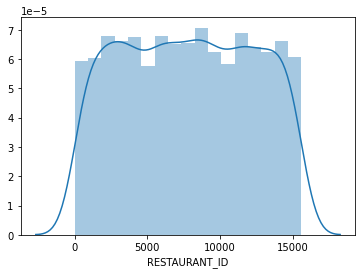

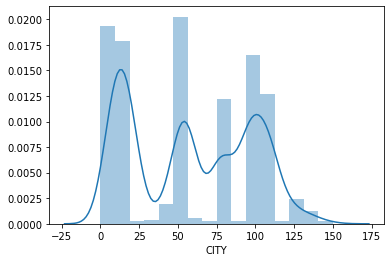

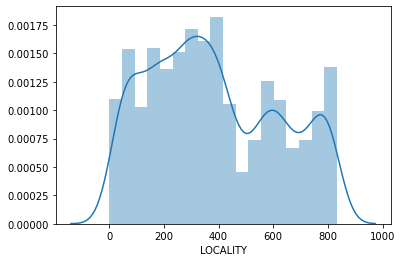

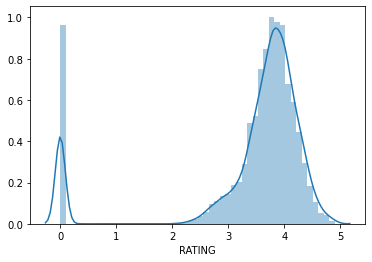

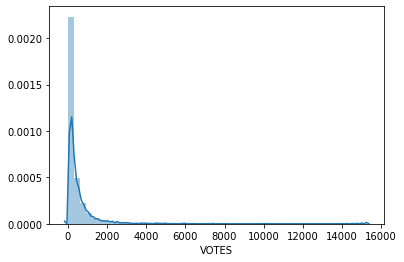

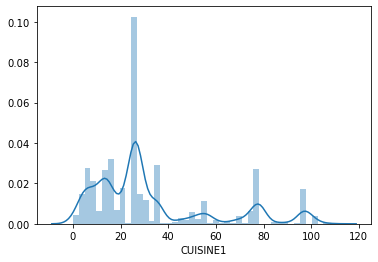

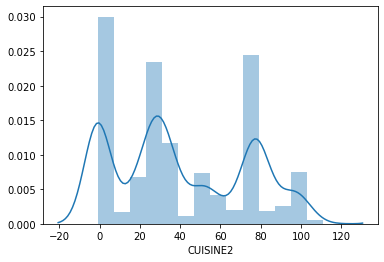

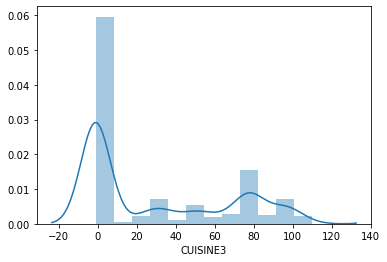

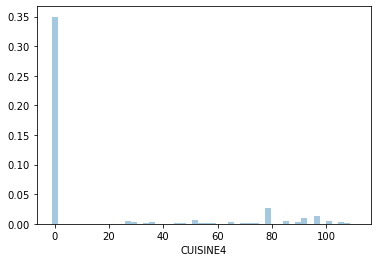

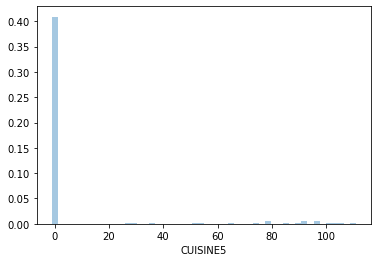

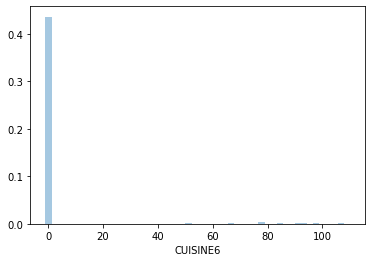

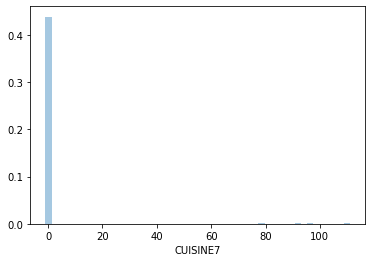

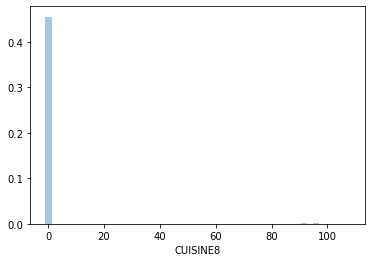

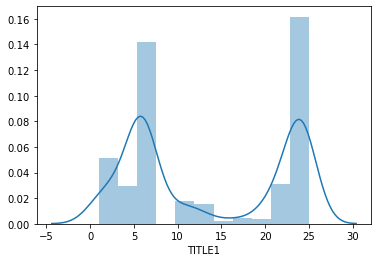

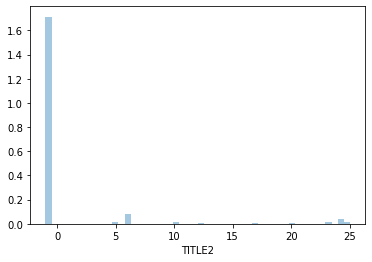

In [120]:
#Lets see the distribution of the train data set using distplot
for i in test.columns:
    sns.distplot(test[i])
    plt.show()

Observations:
    1. We observe our Restaurant_id column to be spread between 0-15500 approx.
    2. CITY is psread between 0-175.
    3. Locality is spread between 0-1000.
    4. RATING is spread between 0-5 with a peak at 0 too which is there resultant of our replacement of 'NEW' and '-' with 0.
    5. VOTES is between 0-16000 with max number of votes concentrated at around 0-2000. VOTE is right skewed.
    6. COST column is spread between 0-14000 with maximum occuring cost between 0-3000. COST column is right skewed too.
    7. CUISINE1 column is spread between 0-120. 
    8. Column CUISINE2 is spread between 0-120.
    9. Column CUISINE3 is spread between 0-140.
    10. CUISINE4, CUISINE5,CUISINE6, CUISINE7, CUISINE8 has most entries to be 0.
    11. TITLE1 has data spread between 0-25.
    12. TITLE2 has data at -1 which we replaced inplace of the Nan values mostly.

In [121]:
test.describe()

,RESTAURANT_ID,CITY,LOCALITY,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
count,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000
mean,7791.438431,58.278658,383.368944,388.935713,32.090522,40.191444,29.440558,15.688017,5.797447,1.618530,0.543843,-0.347908,13.451903,0.619948
std,4458.797621,38.707396,234.889944,800.940258,25.590309,32.733059,37.527556,33.397067,23.300470,14.717211,11.816701,7.685205,9.003072,5.392466
min,3.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,3908.500000,18.000000,192.000000,42.000000,15.000000,13.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6.000000,-1.000000
50%,7798.000000,55.000000,350.000000,134.000000,26.000000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,10.000000,-1.000000
75%,11634.000000,96.000000,581.500000,422.500000,35.000000,78.000000,74.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,24.000000,-1.000000
max,15572.000000,150.000000,833.000000,15205.000000,110.000000,111.000000,110.000000,111.000000,111.000000,110.000000,111.000000,108.000000,25.000000,25.000000


1. Count for every column is 4231.
2. Minimun number of votes is 0 maximum is 15205. 
3. Huge gap between median and mean in the columns VOTES, CUISINE3, CUISINE4 tells that our data is skewed.
4. The great difference between the 75th percentile and max in columns: VOTES, CUISINE1, CUISINE3, CUISINE4, CUISINE5, CUISINE6, CUISINE7, CUISINE8, TITLE2 indicates the presence of outliers.
5. Standard Deviation for columns : RESTAURANT_ID, LOCALITY, VOTES is quite high.

In [122]:
#lets check the skewness of the test data
test.skew()

RESTAURANT_ID     0.006586
CITY              0.086664
LOCALITY          0.313354
RATING           -2.196101
VOTES             7.049220
CUISINE1          1.262722
CUISINE2          0.271011
CUISINE3          0.671085
CUISINE4          1.651396
CUISINE5          3.315699
CUISINE6          5.675601
CUISINE7          7.748809
CUISINE8         11.925797
TITLE1            0.135224
TITLE2            3.632166
dtype: float64

1. Rating is left skewed.
2. VOTES, CUISINE1, CUISINE3, CUISINE4 ,CUISINE5, CUISINE6, CUISINE7, CUISINE8, TITLE2 are right skewed.
3. We will remove the skewness using PowerTransformer.

In [123]:
#Removing skewness for test data
for i in test.skew().index:
    if test.skew().loc[i]>0.55:
        test[i]=pt.fit_transform(test[i].values.reshape(-1,1))
    if test.skew().loc[i]<-0.55:
        test[i]=pt.fit_transform(test[i].values.reshape(-1,1))
    else:
        test[i]=test[i]

In [124]:
test.skew()

RESTAURANT_ID     0.006586
CITY              0.086664
LOCALITY          0.313354
RATING           -0.771889
VOTES            -0.027389
CUISINE1         -0.003987
CUISINE2          0.271011
CUISINE3          0.239507
CUISINE4          1.376132
CUISINE5          2.997178
CUISINE6          5.285497
CUISINE7          7.364233
CUISINE8         11.557939
TITLE1            0.135224
TITLE2            2.507021
dtype: float64

In [125]:
#Removing outliers using zscore
#Threshold=3
z=np.abs(zscore(test))
test_new=test[(z<3).all(axis=1)]
print('Before removing outliers shape was: ',test.shape,'\tAfter removing outliers shape is: ',test_new.shape)

Before removing outliers shape was:  (4231, 15) 	After removing outliers shape is:  (3867, 15)


In [126]:
test_new

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,4085,110,662,1.151430,0.873125,0.037787,55.0,1.169262,1.908852,-0.303102,-0.182931,-0.133422,-0.085912,6,-0.350112
1,12680,96,221,0.943467,-0.403287,0.408535,78.0,1.219237,1.921072,-0.303102,-0.182931,-0.133422,-0.085912,24,-0.350112
2,1411,96,411,0.197719,0.561354,-0.581067,26.0,1.188228,1.918823,-0.303102,-0.182931,-0.133422,-0.085912,6,-0.350112
3,204,41,456,0.197719,1.557886,-0.581067,-1.0,-0.897244,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,21,-0.350112
4,13453,78,300,-0.126439,-0.834349,1.049873,97.0,-0.897244,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,24,-0.350112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,1670,96,221,0.553795,0.214700,0.037787,74.0,1.188228,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,24,-0.350112
4226,9057,108,597,0.371663,0.438195,0.037787,74.0,1.188228,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,6,-0.350112
4228,8617,41,696,0.031754,-0.469910,0.127774,78.0,-0.897244,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,24,-0.350112
4229,6485,78,332,-2.293521,-1.902931,-0.728275,90.0,-0.897244,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,24,-0.350112


In [127]:
test_new.skew()

RESTAURANT_ID    0.005775
CITY             0.085200
LOCALITY         0.305909
RATING          -0.743938
VOTES           -0.074272
CUISINE1         0.122984
CUISINE2         0.178406
CUISINE3         0.441280
CUISINE4         2.028495
CUISINE5         0.000000
CUISINE6         0.000000
CUISINE7         0.000000
CUISINE8         0.000000
TITLE1           0.053275
TITLE2           2.700199
dtype: float64

In [128]:
#Scaling the data using MinMaxScaler
test_data=mnm.fit_transform(test_new)
final_test=pd.DataFrame(test_data,columns=test_new.columns)
final_test

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,0.262188,0.733333,0.794471,0.704489,0.568291,0.547931,0.500000,0.935138,0.992222,0.0,0.0,0.0,0.0,0.208333,0.0
1,0.814246,0.640000,0.264423,0.661961,0.306995,0.629253,0.705357,0.957754,0.997201,0.0,0.0,0.0,0.0,0.958333,0.0
2,0.090436,0.640000,0.492788,0.509456,0.504468,0.412188,0.241071,0.943721,0.996285,0.0,0.0,0.0,0.0,0.208333,0.0
3,0.012910,0.273333,0.546875,0.509456,0.708470,0.412188,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.833333,0.0
4,0.863896,0.520000,0.359375,0.443166,0.218751,0.769927,0.875000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.958333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,0.107072,0.640000,0.264423,0.582273,0.433504,0.547931,0.669643,0.943721,0.000000,0.0,0.0,0.0,0.0,0.958333,0.0
3863,0.581540,0.720000,0.716346,0.545027,0.479256,0.547931,0.669643,0.943721,0.000000,0.0,0.0,0.0,0.0,0.208333,0.0
3864,0.553279,0.273333,0.835337,0.475516,0.293356,0.567669,0.705357,0.000000,0.000000,0.0,0.0,0.0,0.0,0.958333,0.0
3865,0.416340,0.520000,0.397837,0.000000,0.000000,0.379898,0.812500,0.000000,0.000000,0.0,0.0,0.0,0.0,0.958333,0.0


In [129]:
#Now we will load the saved model and will run the model on above data.
load=joblib.load('restaurant.pkl')
load.predict(final_test)

array([ 1.45896613, -0.2303514 ,  2.13675107, ..., -0.24918342,
       -0.7415387 , -0.42216487])